# Titanic Survival Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

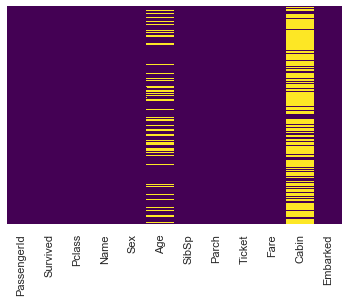

In [5]:
sns.heatmap(train.isnull(), 
            yticklabels = False, 
            cbar = False, 
            cmap = 'viridis')

In [6]:
sns.set_style('whitegrid')

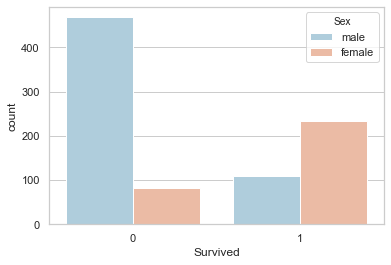

In [7]:
sns.countplot(x='Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

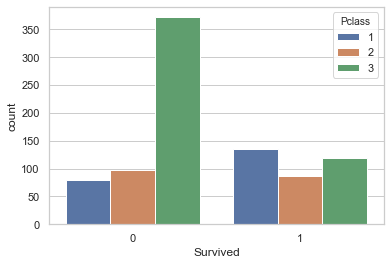

In [8]:
sns.countplot(x='Survived', hue = 'Pclass', data = train)

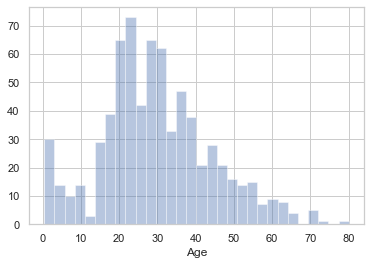

In [9]:
sns.distplot(train['Age'].dropna(), kde = False, bins=30)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


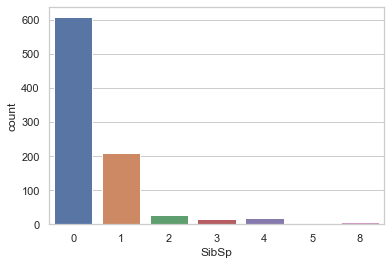

In [11]:
sns.countplot(x='SibSp', data=train)

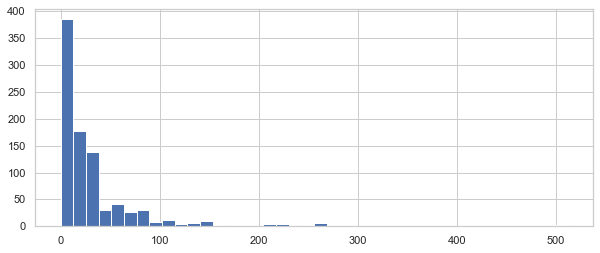

In [12]:
train['Fare'].hist(bins=40, figsize =(10,4))

In [13]:
import cufflinks as cf
cf.go_offline()

In [14]:
train['Fare'].iplot(kind='hist',bins=40)

## Preprocessing Data

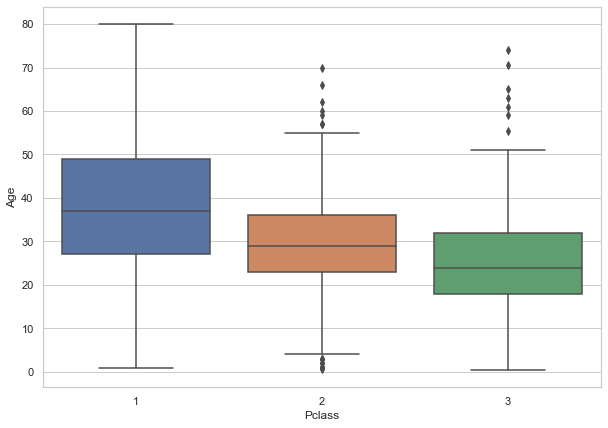

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y = 'Age', data=train)

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass =  cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [17]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

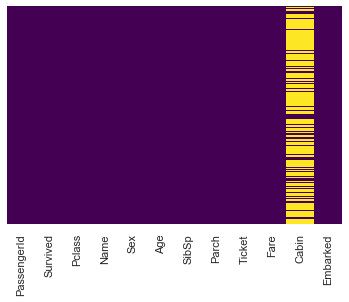

In [18]:
sns.heatmap(train.isnull(), yticklabels = False, cbar =False, cmap='viridis')

In [19]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

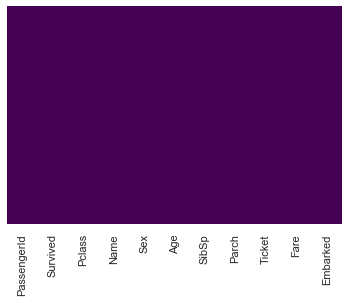

In [20]:
sns.heatmap(train.isnull(), yticklabels = False, cbar =False, cmap='viridis')

In [21]:
train.dropna(inplace=True)

In [22]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex2 = pd.get_dummies(test['Sex'], drop_first=True)

In [24]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark2 = pd.get_dummies(test['Embarked'], drop_first=True)

In [25]:
pclass = pd.get_dummies(train['Pclass'], drop_first=True)
pclass2 = pd.get_dummies(test['Pclass'], drop_first=True)

In [26]:
train = pd.concat([train, sex, embark, pclass], axis=1)
test = pd.concat([test, sex2, embark2, pclass2], axis=1)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [28]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Pclass'], axis=1, inplace =True)
test.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Pclass'], axis=1, inplace =True)

In [29]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [30]:
train.drop('PassengerId', axis=1, inplace=True)
pid = test['PassengerId']
test.drop('PassengerId', axis=1, inplace=True)

In [31]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Building the model

In [32]:
x = train.drop('Survived',axis=1)
y = train['Survived']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression()

In [37]:
logmodel.fit(x_train, y_train)

C:\Users\userpc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [38]:
predictions = logmodel.predict(x_validation)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_validation,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_validation,predictions)

array([[150,  13],
       [ 33,  71]], dtype=int64)

In [43]:
test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [44]:
finalpred = logmodel.predict(test)

In [45]:
pred = pd.DataFrame(data=finalpred,columns=['Survived'])

In [46]:
titanic = pd.concat([pid, pred], axis=1)

In [47]:
titanic.to_csv('titanic_result.csv',index=False)

# END!!!